# Model Prediction

Three experiments:
- using Logisitc Regression
- using Random Decision Trees
- using a Bagging Classifier with a Random Decision Tree being the estimator

**Import Statements**

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("clean_data.csv")
df = df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis="columns")
df

,url,protocol,www_present,sub_domain,domain,top_domain,dir,file,path,fragment,...,n_hyphens,n_underscore,n_slash,n_questionmrk,n_equals,n_at,n_and,n_exclamation,url_length,domain_name_correct
0,https://ghfdc.knuodwq.cn/,1,0,1,1,1,0,0,1,0,...,0,0,3,0,0,0,0,0,25,1
1,https://rakutenluyaw.ouxawer-p.net/,1,0,1,1,1,0,0,1,0,...,1,0,3,0,0,0,0,0,35,1
2,pulsagratiss-1010.000webhostapp.com,0,0,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,35,1
3,idjvn.com,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0
4,http://www.vmveg.com//vendor/phpunit/phpunit/s...,1,1,1,1,1,0,1,1,0,...,0,0,10,1,0,0,0,0,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98567,interceder.net/topic/Guy-Turcotte,0,0,0,1,1,1,1,1,0,...,1,0,2,0,0,0,0,0,33,1
98568,ifes.org/Divisions/List-Projects.aspx,0,0,0,1,1,1,1,1,0,...,1,0,2,0,0,0,0,0,37,0
98569,en.wikipedia.org/wiki/Jeffrey_Lynn,0,0,1,1,1,1,1,1,0,...,0,1,2,0,0,0,0,0,34,1
98570,ccdowney.com/bible-college/,0,0,0,1,1,1,0,1,0,...,1,0,2,0,0,0,0,0,27,1


**Determimg the number of outliers and removing them**

In [3]:
# determimg the number of outliers
clf = IsolationForest(contamination=0.03)
X = df.iloc[:, 1:].dropna() 
y_pred = clf.fit_predict(X)
outliers = np.where(y_pred==-1)
outliers = outliers[0]
print(outliers)
print('Number of outliers:', len(outliers))
print(df.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


[   12    46    53 ... 98232 98475 98534]
Number of outliers: 2957
(98572, 23)


In [4]:
outliers_exist = df.index.isin(outliers)
df_scaled = df[~outliers_exist]
print('Number of rows after dropping outliers:', df_scaled.shape[0])

Number of rows after dropping outliers: 95615


In [5]:
df_scaled

,url,protocol,www_present,sub_domain,domain,top_domain,dir,file,path,fragment,...,n_hyphens,n_underscore,n_slash,n_questionmrk,n_equals,n_at,n_and,n_exclamation,url_length,domain_name_correct
0,https://ghfdc.knuodwq.cn/,1,0,1,1,1,0,0,1,0,...,0,0,3,0,0,0,0,0,25,1
1,https://rakutenluyaw.ouxawer-p.net/,1,0,1,1,1,0,0,1,0,...,1,0,3,0,0,0,0,0,35,1
2,pulsagratiss-1010.000webhostapp.com,0,0,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,35,1
3,idjvn.com,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0
4,http://www.vmveg.com//vendor/phpunit/phpunit/s...,1,1,1,1,1,0,1,1,0,...,0,0,10,1,0,0,0,0,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98567,interceder.net/topic/Guy-Turcotte,0,0,0,1,1,1,1,1,0,...,1,0,2,0,0,0,0,0,33,1
98568,ifes.org/Divisions/List-Projects.aspx,0,0,0,1,1,1,1,1,0,...,1,0,2,0,0,0,0,0,37,0
98569,en.wikipedia.org/wiki/Jeffrey_Lynn,0,0,1,1,1,1,1,1,0,...,0,1,2,0,0,0,0,0,34,1
98570,ccdowney.com/bible-college/,0,0,0,1,1,1,0,1,0,...,1,0,2,0,0,0,0,0,27,1


In [6]:
len(np.where(df['status'].isnull())[0])

0

**Experiment 1**
- Creating out independent and dependent variables
- Using a 5-Fold cross validtion
- Testing our 5-Fold cross-validation on Logisitc Regression and Random Trees

In [7]:
# adding in the protocol feature increases our overall accuracy by about 6%
# taking away our n_period feature decreases our accuracy by about 1%
# taking away out domain_name_correct feature decreases our overall accuracy by about 0.5%
X = df_scaled[["n_hyphens", "path", "url_length", "n_period", "domain_name_correct", "top_domain", "protocol"]]
y = df_scaled[["status"]]
scaler = StandardScaler()
X_log = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True)
fold_no = 1
for train, test, in kf.split(X, y):
    X = scaler.fit_transform(X)
    
    X_train, X_test = X[train], X[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    model = LogisticRegression()
    y_pred = model.fit(X_train, y_train)
    
    # evaluate the model
    score = model.score(X_test, y_test)
    # find the mean of the score
    print(f'Score for fold {fold_no}: {score*100}%')
    fold_no += 1

Score for fold 1: 85.25858913350416%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score for fold 2: 85.21675469330125%
Score for fold 3: 85.00758249228677%
Score for fold 4: 84.87684986665272%
Score for fold 5: 84.61015531035926%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
kfold = KFold(n_splits=5, shuffle=True, random_state=22)

logistic_model = LogisticRegression()
logistic_scores = cross_val_score(logistic_model, X_log, y, cv=kfold)

random_forest_model = RandomForestClassifier()

random_forest_scores = cross_val_score(random_forest_model, X, y, cv=kfold)

# what scores are these?
# its the accuracy of the model
print(f'Logistic Regression scores: {logistic_scores}')
print(f'Random Forest scores: {random_forest_scores}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Logistic Regression scores: [0.85106939 0.85164462 0.8457355  0.85018041 0.85117398]
Random Forest scores: [0.85645558 0.85525284 0.85258589 0.85504366 0.85384092]


**Experiment 2:**
- Using a Pipeline function to include a Bagging method using a Random Tree
- Using SimpleImputer to replace any missing values with a desciprtive stat if any were missed in preprocessing
- Using 5-fold cross-validation

In [9]:
bag = BaggingClassifier(estimator =RandomForestClassifier(),  n_estimators = 12, oob_score = True, random_state = 22)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
pipeline = Pipeline([('imputer', SimpleImputer()), ('bagging decision tree model', bag)])
accuracy_score_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
accuracy_score_test = cross_val_score(pipeline, X_test, y_test, cv=5, scoring='accuracy')
print("Train data accuracy:", accuracy_score_train)
print("Test data accuracy:", accuracy_score_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:791: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:797: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/en

Train data accuracy: [0.85678608 0.8590494  0.85380893 0.8545114  0.85365283]
Test data accuracy: [0.85644113 0.84519094 0.85422279 0.85816165 0.85166403]


**Metrics**
- The following metrics are used to evaluate the performance of our models
    Accuracy, Sensitivity, Specificity, AUC on all three models

In [11]:
logistic_accuracy_test = []
logistic_sensitivity_test = []
logistic_specificity_test = []
logistic_auc_test = []

logistic_accuracy_train = []
logistic_sensitivity_train = []
logistic_specificity_train = []
logistic_auc_train = []

random_forest_accuracy_test = []
random_forest_sensitivity_test = []
random_forest_specificity_test = []
random_forest_auc_test = []

random_forest_accuracy_train = []
random_forest_sensitivity_train = []
random_forest_specificity_train = []
random_forest_auc_train = []

bag_accuracy_test = []
bag_sensitivity_test = []
bag_specificity_test = []
bag_auc_test = []

bag_accuracy_train = []
bag_sensitivity_train = []
bag_specificity_train = []
bag_auc_train = []

In [12]:
fold_no = 1
X = df_scaled[["n_hyphens", "path", "url_length", "n_period", "domain_name_correct", "top_domain", "protocol"]]
y = df_scaled[["status"]]
for train, test in kf.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    logistic_model.fit(X_train, y_train)
    logistic_y_pred_train = logistic_model.predict(X_train) # train
    logistic_y_pred = logistic_model.predict(X_test) # testing
    
    logistic_accuracy_test.append(accuracy_score(y_test, logistic_y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, logistic_y_pred).ravel()
    logistic_sensitivity_test.append(tp / (tp + fn))
    logistic_specificity_test.append(tn / (tn + fp))
    logistic_auc_test.append(roc_auc_score(y_test, logistic_y_pred))
    
    logistic_accuracy_train.append(accuracy_score(y_train, logistic_y_pred_train))
    tn, fp, fn, tp = confusion_matrix(y_train, logistic_y_pred_train).ravel()
    logistic_sensitivity_train.append(tp / (tp + fn))
    logistic_specificity_train.append(tn / (tn + fp))
    logistic_auc_train.append(roc_auc_score(y_train, logistic_y_pred_train))
    
    random_forest_model.fit(X_train, y_train)
    random_forest_y_pred_train = random_forest_model.predict(X_train) # train
    random_forest_y_pred = random_forest_model.predict(X_test) # testing
    
    random_forest_accuracy_test.append(accuracy_score(y_test, random_forest_y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, random_forest_y_pred).ravel()
    random_forest_sensitivity_test.append(tp / (tp + fn))
    random_forest_specificity_test.append(tn / (tn + fp))
    random_forest_auc_test.append(roc_auc_score(y_test, random_forest_y_pred))
    
    random_forest_accuracy_train.append(accuracy_score(y_train, random_forest_y_pred_train))
    tn, fp, fn, tp = confusion_matrix(y_train, random_forest_y_pred_train).ravel()
    random_forest_sensitivity_train.append(tp / (tp + fn))
    random_forest_specificity_train.append(tn / (tn + fp))
    random_forest_auc_train.append(roc_auc_score(y_train, random_forest_y_pred_train))
    
    bag.fit(X_train, y_train)
    bag_y_pred_train = bag.predict(X_train) # train
    bag_y_pred = bag.predict(X_test) # testing
    
    bag_accuracy_test.append(accuracy_score(y_test, bag_y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, bag_y_pred).ravel()
    bag_sensitivity_test.append(tp / (tp + fn))
    bag_specificity_test.append(tn / (tn + fp))
    bag_auc_test.append(roc_auc_score(y_test, bag_y_pred))
    
    bag_accuracy_train.append(accuracy_score(y_train, bag_y_pred_train))
    tn, fp, fn, tp = confusion_matrix(y_train, bag_y_pred_train).ravel()
    bag_sensitivity_train.append(tp / (tp + fn))
    bag_specificity_train.append(tn / (tn + fp))
    bag_auc_train.append(roc_auc_score(y_train, bag_y_pred_train))
    
    print(f"Train Metrics for fold {fold_no}:")
    print(f"Logistic Regression - Accuracy: {logistic_accuracy_train[-1]}, Sensitivity: {logistic_sensitivity_train[-1]}, Specificity: {logistic_specificity_train[-1]}, AUC: {logistic_auc_train[-1]}")
    print(f"Random Forest - Accuracy: {random_forest_accuracy_train[-1]}, Sensitivity: {random_forest_sensitivity_train[-1]}, Specificity: {random_forest_specificity_train[-1]}, AUC: {random_forest_auc_train[-1]}")
    print(f"Bagging Classifier - Accuracy: {bag_accuracy_train[-1]}, Sensitivity: {bag_sensitivity_train[-1]}, Specificity: {bag_specificity_train[-1]}, AUC: {bag_auc_train[-1]}")
    print()
    
    print(f"Test Metrics for fold {fold_no}:")
    print(f"Logistic Regression - Accuracy: {logistic_accuracy_test[-1]}, Sensitivity: {logistic_sensitivity_test[-1]}, Specificity: {logistic_specificity_test[-1]}, AUC: {logistic_auc_test[-1]}")
    print(f"Random Forest - Accuracy: {random_forest_accuracy_test[-1]}, Sensitivity: {random_forest_sensitivity_test[-1]}, Specificity: {random_forest_specificity_test[-1]}, AUC: {random_forest_auc_test[-1]}")
    print(f"Bagging Classifier - Accuracy: {bag_accuracy_test[-1]}, Sensitivity: {bag_sensitivity_test[-1]}, Specificity: {bag_specificity_test[-1]}, AUC: {bag_auc_test[-1]}")
    print()
    
    fold_no += 1

print("Average Testing Metrics:")
print(f"Logistic Regression - Accuracy: {sum(logistic_accuracy_test) / len(logistic_accuracy_test)}, Sensitivity: {sum(logistic_sensitivity_test) / len(logistic_sensitivity_test)}, Specificity: {sum(logistic_specificity_test) / len(logistic_specificity_test)}, AUC: {sum(logistic_auc_test) / len(logistic_auc_test)}")
print(f"Random Forest - Accuracy: {sum(random_forest_accuracy_test) / len(random_forest_accuracy_test)}, Sensitivity: {sum(random_forest_sensitivity_test) / len(random_forest_sensitivity_test)}, Specificity: {sum(random_forest_specificity_test) / len(random_forest_specificity_test)}, AUC: {sum(random_forest_auc_test) / len(random_forest_auc_test)}")
print(f"Bagging Classifier - Accuracy: {sum(bag_accuracy_test) / len(bag_accuracy_test)}, Sensitivity: {sum(bag_sensitivity_test) / len(bag_sensitivity_test)}, Specificity: {sum(bag_specificity_test) / len(bag_specificity_test)}, AUC: {sum(bag_auc_test) / len(bag_auc_test)}")
print(f"OOB Score: {bag.oob_score_}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_1764449/4210569646.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:791: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/

Train Metrics for fold 1:
Logistic Regression - Accuracy: 0.8508210008889818, Sensitivity: 0.9242568311480333, Specificity: 0.7704774419623303, AUC: 0.8473671365551817
Random Forest - Accuracy: 0.8769413794906656, Sensitivity: 0.9414973476128515, Specificity: 0.8063129653964083, AUC: 0.8739051565046299
Bagging Classifier - Accuracy: 0.8742221408774774, Sensitivity: 0.9384946451806626, Specificity: 0.8039038545773105, AUC: 0.8711992498789866

Test Metrics for fold 1:
Logistic Regression - Accuracy: 0.8470428280081577, Sensitivity: 0.9203362690152121, Specificity: 0.7668382433468405, AUC: 0.8435872561810263
Random Forest - Accuracy: 0.856246404852795, Sensitivity: 0.9210368294635709, Specificity: 0.7853466213996276, AUC: 0.8531917254315993
Bagging Classifier - Accuracy: 0.8568739214558385, Sensitivity: 0.9221377101681345, Specificity: 0.7854561384295258, AUC: 0.8537969242988301



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_1764449/4210569646.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:791: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/

Train Metrics for fold 2:
Logistic Regression - Accuracy: 0.8491999163311196, Sensitivity: 0.921917191719172, Specificity: 0.7695089872862779, AUC: 0.845713089502725
Random Forest - Accuracy: 0.8764445955132563, Sensitivity: 0.9423942394239424, Specificity: 0.8041703200350724, AUC: 0.8732822797295072
Bagging Classifier - Accuracy: 0.8734900381739267, Sensitivity: 0.937043704370437, Specificity: 0.803841516878562, AUC: 0.8704426106244995

Test Metrics for fold 2:
Logistic Regression - Accuracy: 0.8533179940385923, Sensitivity: 0.9317269076305221, Specificity: 0.7680890538033395, AUC: 0.8499079807169309
Random Forest - Accuracy: 0.8573968519583748, Sensitivity: 0.9267068273092369, Specificity: 0.7820582778565972, AUC: 0.8543825525829171
Bagging Classifier - Accuracy: 0.8593839878680123, Sensitivity: 0.9267068273092369, Specificity: 0.7862053912474081, AUC: 0.8564561092783225



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_1764449/4210569646.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_tr

Train Metrics for fold 3:
Logistic Regression - Accuracy: 0.8496574805208388, Sensitivity: 0.9227165689663811, Specificity: 0.7699185213539673, AUC: 0.8463175451601742
Random Forest - Accuracy: 0.8773727971552581, Sensitivity: 0.9432586802946039, Specificity: 0.8054628971400448, AUC: 0.8743607887173244
Bagging Classifier - Accuracy: 0.8742482874026042, Sensitivity: 0.9409790069642767, Specificity: 0.8014163066659376, AUC: 0.8711976568151071

Test Metrics for fold 3:
Logistic Regression - Accuracy: 0.8513308581289547, Sensitivity: 0.9259812711695556, Specificity: 0.7688497523390203, AUC: 0.847415511754288
Random Forest - Accuracy: 0.8550436646969618, Sensitivity: 0.9204024706116757, Specificity: 0.7828288387451844, AUC: 0.8516156546784299
Bagging Classifier - Accuracy: 0.8557234743502589, Sensitivity: 0.9226937636979478, Specificity: 0.7817281232801321, AUC: 0.8522109434890399



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_1764449/4210569646.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:791: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/

Train Metrics for fold 4:
Logistic Regression - Accuracy: 0.8501934842859384, Sensitivity: 0.9242265207177488, Specificity: 0.7689840451779154, AUC: 0.8466052829478322
Random Forest - Accuracy: 0.8767191340270878, Sensitivity: 0.9400959664117559, Specificity: 0.8071988595866001, AUC: 0.8736474129991781
Bagging Classifier - Accuracy: 0.8739737488887727, Sensitivity: 0.936372269705603, Specificity: 0.8055266187839245, AUC: 0.8709494442447637

Test Metrics for fold 4:
Logistic Regression - Accuracy: 0.8500235318726141, Sensitivity: 0.9195332930999799, Specificity: 0.7747522056420869, AUC: 0.8471427493710334
Random Forest - Accuracy: 0.8548344924959473, Sensitivity: 0.9166163749748542, Specificity: 0.7879315978651563, AUC: 0.8522739864200053
Bagging Classifier - Accuracy: 0.8573445589081211, Sensitivity: 0.9169181251257292, Specificity: 0.7928330247249755, AUC: 0.8548755749253524



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_1764449/4210569646.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_tr

Train Metrics for fold 5:
Logistic Regression - Accuracy: 0.8502849971238823, Sensitivity: 0.9245968145847941, Specificity: 0.7691192560175055, AUC: 0.8468580353011498
Random Forest - Accuracy: 0.8772028447419338, Sensitivity: 0.9419513172393068, Specificity: 0.8064824945295405, AUC: 0.8742169058844236
Bagging Classifier - Accuracy: 0.8744966793913089, Sensitivity: 0.939121506561154, Specificity: 0.8039113785557986, AUC: 0.8715164425584764

Test Metrics for fold 5:
Logistic Regression - Accuracy: 0.8479318098624693, Sensitivity: 0.919193934557063, Specificity: 0.7694252115617101, AUC: 0.8443095730593866
Random Forest - Accuracy: 0.8520106677822518, Sensitivity: 0.9167996807661613, Specificity: 0.7806352346411694, AUC: 0.8487174577036654
Bagging Classifier - Accuracy: 0.8535794592898603, Sensitivity: 0.9174980047885076, Specificity: 0.7831629849434004, AUC: 0.8503304948659539

Average Testing Metrics:
Logistic Regression - Accuracy: 0.8499294043821577, Sensitivity: 0.9233543350944666, S

In [13]:
train_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Bagging Classifier'],
    'Accuracy': [sum(logistic_accuracy_train) / len(logistic_accuracy_train), sum(random_forest_accuracy_train) / len(random_forest_accuracy_train), sum(bag_accuracy_train) / len(bag_accuracy_train)],
    'Sensitivity': [sum(logistic_sensitivity_train) / len(logistic_sensitivity_train), sum(random_forest_sensitivity_train) / len(random_forest_sensitivity_train), sum(bag_sensitivity_train) / len(bag_sensitivity_train)],
    'Specificity': [sum(logistic_specificity_train) / len(logistic_specificity_train), sum(random_forest_specificity_train) / len(random_forest_specificity_train), sum(bag_specificity_train) / len(bag_specificity_train)],
    'AUC': [sum(logistic_auc_train) / len(logistic_auc_train), sum(random_forest_auc_train) / len(random_forest_auc_train), sum(bag_auc_train) / len(bag_auc_train)]
})
train_metrics.head()

,Model,Accuracy,Sensitivity,Specificity,AUC
0,Logistic Regression,0.850031,0.923543,0.769602,0.846572
1,Random Forest,0.876936,0.941840,0.805926,0.873883
2,Bagging Classifier,0.874086,0.938402,0.803720,0.871061


In [14]:
test_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Bagging Classifier'],
    'Accuracy': [sum(logistic_accuracy_test) / len(logistic_accuracy_test), sum(random_forest_accuracy_test) / len(random_forest_accuracy_test), sum(bag_accuracy_test) / len(bag_accuracy_test)],
    'Sensitivity': [sum(logistic_sensitivity_test) / len(logistic_sensitivity_test), sum(random_forest_sensitivity_test) / len(random_forest_sensitivity_test), sum(bag_sensitivity_test) / len(bag_sensitivity_test)],
    'Specificity': [sum(logistic_specificity_test) / len(logistic_specificity_test), sum(random_forest_specificity_test) / len(random_forest_specificity_test), sum(bag_specificity_test) / len(bag_specificity_test)],
    'AUC': [sum(logistic_auc_test) / len(logistic_auc_test), sum(random_forest_auc_test) / len(random_forest_auc_test), sum(bag_auc_test) / len(bag_auc_test)]
})
test_metrics.head()

,Model,Accuracy,Sensitivity,Specificity,AUC
0,Logistic Regression,0.849929,0.923354,0.769591,0.846473
1,Random Forest,0.855106,0.920312,0.783760,0.852036
2,Bagging Classifier,0.856581,0.921191,0.785877,0.853534


**Feature Importances Per Model**

In [37]:
# figure out what the best features are for each model, then print out the top 3 features
logistic_model.fit(X, y)
random_forest_model.fit(X, y)
bag.fit(X, y)

rf_importances = random_forest_model.feature_importances_

lr_importances = np.abs(logistic_model.coef_)
feature_names = X.columns


print("Random Forest:")
print(feature_names)
print(rf_importances)


print("Logistic Regression:")
print(feature_names)
print(lr_importances)
    


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_1764449/3579776656.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest:
Index(['n_hyphens', 'path', 'url_length', 'n_period', 'domain_name_correct',
       'top_domain', 'protocol'],
      dtype='object')
[0.06741931 0.33907404 0.1850951  0.08000518 0.00674107 0.00069254
 0.32097276]
Logistic Regression:
Index(['n_hyphens', 'path', 'url_length', 'n_period', 'domain_name_correct',
       'top_domain', 'protocol'],
      dtype='object')
[[0.43411545 7.33056577 0.01167907 0.35942643 0.36797629 2.59127344
  2.8716861 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:791: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:797: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


**ROC Curves**

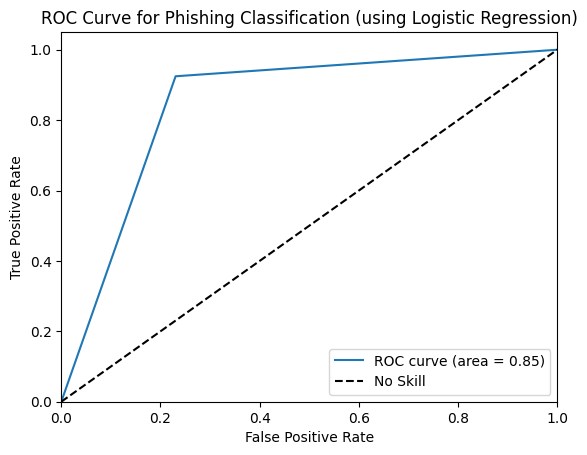

In [27]:
fpr, tpr, thresholds = roc_curve(y_train, logistic_model.predict(X_train))
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Phishing Classification (using Logistic Regression)')
plt.legend()
plt.show()

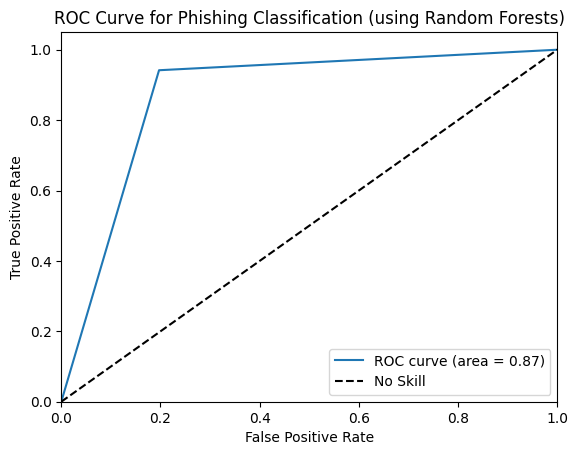

In [26]:
fpr, tpr, thresholds = roc_curve(y_train, random_forest_model.predict(X_train))
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Phishing Classification (using Random Forests)')
plt.legend()
plt.show()

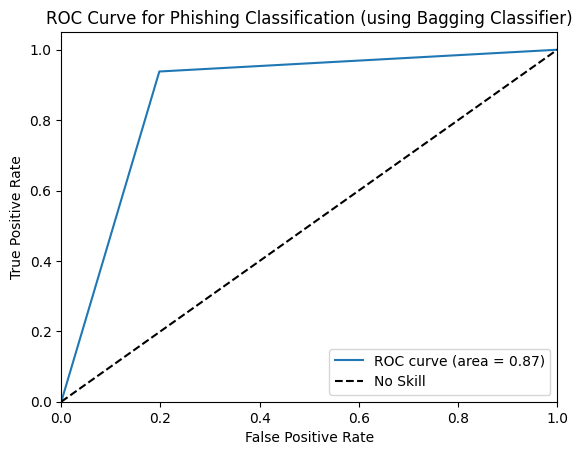

In [28]:
fpr, tpr, thresholds = roc_curve(y_train, bag.predict(X_train))
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Phishing Classification (using Bagging Classifier)')
plt.legend()
plt.show()

### Summary of Results

**Are the results statistically significant? Did you prove or disprove your hypothesis. How could you
improve your analysis? Lessons learned.**

The results obtained from the hypothesis tests conducted were all statistically significant except for the feature called "www_present." We rejected the null hypothesis for the t-tests conducted with the features n-(symbol), indicating that the difference between the means of the groups is significant and not due to chance. Similarly, we rejected the null hypotheses for the chi-squared test of independence with categorical features such as protocol and www_present. This suggests that there is a relationship between the two variables that is not due to chance. Consequently, this entire experiment disproves the hypothesis, as the features with the highest importance in the analysis were, in order, path, protocol, and url_length for random forest, and path, protocol, and top_domain for logistic regression. Except for url_length, all of the significant features were related to specific parts of a URL. Regrettably, our hypothesis states that "if a URL is longer in size, contains spelling mistakes, and is missing some crucial parts a URL should have, then the URL must not be legit." However, for the highest performing model, only two of the three conditions were satisfied. To enhance our analysis, we could create features to investigate if a URL has a certificate, if the URL was created using a URL shortener, or employ more creative methods to evaluate the security level of the URL. Some insights we gained include the importance of ensuring all null data values are dropped, detecting and removing outliers, and ensuring our features align with the context of our goal, which is crucial when identifying predictable features.